<a href="https://colab.research.google.com/github/aradhyajain430/chem-1560k/blob/main/Exercise_1_CHEM_1560K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Generates the kinetic energy operator with a for loop
def kineticOP(big_N: int, mass: float, L: float) -> np.ndarray:
    dx = L / (big_N - 1)
    n = big_N - 2
    array = np.zeros((n,n), float)
    for i in range(n-1):
        array[i, i] = -2.0
        array[i + 1, i] = 1.0
        array[i, i + 1] = 1.0
    array[n-1, n-1] = -2.0

    return -(array / (dx * dx * 2 * mass))


[[16. -8. -0.]
 [-8. 16. -8.]
 [-0. -8. 16.]]


In [39]:
def test_kineticOP():
    T = kineticOP(6, 1.0, 1.0)
    v = np.array([0.0, 1.0, 0.0, 0.0])
    return np.dot(T, v)

print(test_kineticOP())


# should return something of the structure k(-1, 2, -1, 0).
# We are testing the ability of the kinetic operator to
# return the expected state of the kinetic energy in the position basis

[-12.5  25.  -12.5   0. ]


In [40]:
N = 11
m = 1.0
L = 1.0
H = kineticOP(N, m, L)
E, V = np.linalg.eigh(H)

# Calculate the first 9 eigenvalues and compare to the analytical eigenvalues

for n in range(1,10):
    Eex = n**2 * np.pi*np.pi / 2

    print(n, E[n-1], abs(E[n-1]-Eex), str((E[n-1]-Eex) * 100 /Eex) + "%")

1 4.894348370484679 0.040453830059999696 -0.8197659889090307%
2 19.09830056250524 0.6409082396734753 -3.2468790724921814%
3 41.221474770752664 3.1917450341494487 -7.186475216546132%
4 69.09830056250523 9.858534646209634 -12.485979991661948%
5 99.99999999999993 23.370055013617048 -18.943053086129837%
6 130.90169943749467 46.75117978211378 -26.316027067774993%
7 158.77852522924735 83.0267825974419 -34.33621178280761%
8 180.90169943749478 134.92564139736467 -42.721330281508116%
9 195.1056516295153 204.6133266146037 -51.18929491750099%


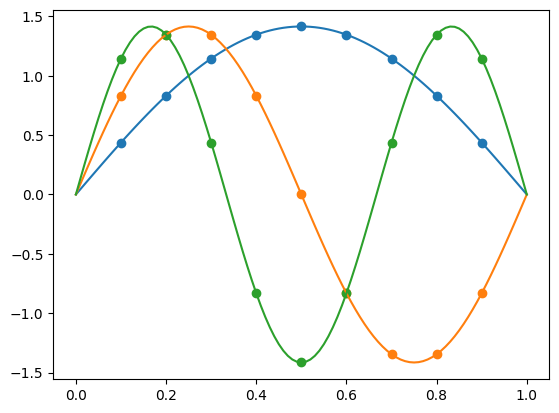

In [41]:
# Define the grid sizes for plotting
xd = np.linspace(0, 1, 101)
x = np.linspace(0, L, N)[1:-1]

plt.figure()

# Plot the first three eigenstates vs the analytical states
for n in [1, 2, 3]:
    plt.plot(xd, np.sqrt(2) * np.sin(n * np.pi * xd))

    psi = V[:, n - 1] / np.sqrt(L/(N-1))
    plt.scatter(x, psi)

plt.show()

# From the values shown they seem to compare reasonably well, although the
# third state slowly stops capturing the curvature well

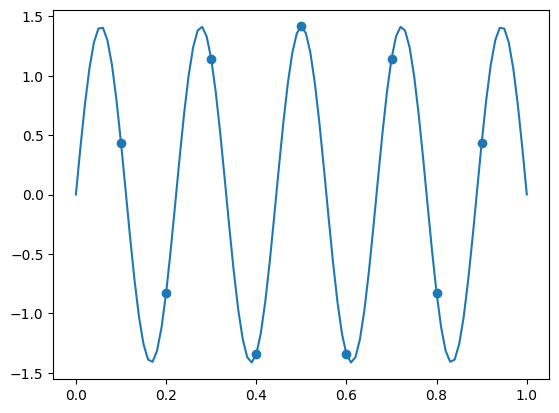

In [42]:
# Plots the ninth state
plt.figure()
plt.plot(xd, np.sqrt(2)*np.sin(9*np.pi*xd))

psi = V[:,8]/np.sqrt(L/(N-1))
plt.scatter(x, psi)
plt.show()

# Doesn't capture the curvature well at all - seems completely jagged
# It seems as though the greater the energy error, the worse the curvature is captured

In [43]:
# Generating the potential function - diagonal in the position basis
def potentialOP(N, Lbox, c):
    x = np.linspace(-Lbox/2, 3*Lbox/2, N)
    V = np.zeros((N, N))

    for i in range(N):
        if x[i] <= 0 or x[i] >= Lbox:
            V[i, i] = c
        else:
            V[i, i] = 0.0

    return V, x

In [44]:
# Checks if the potential operator returns 0 inside the box and c outside
def test_potentialOP():
    N = 21
    L = 1.0
    c = 10.0

    V, x = potentialOP(N, L, c)

    for i in [0, 5, 10, 15, 20]:
        e = np.zeros(N)
        e[i] = 1.0
        print("x =", x[i], " V|x_i> =", V @ e)


In [45]:
# Calculate the Hamiltonian T+V

N = 21
L = 1.0
m = 1.0
c = 1000.0

T = kineticOP(N, m, 2*L)
V, x = potentialOP(N, L, c)

H = T + V[1:-1, 1:-1]

E, psi = np.linalg.eigh(H)


E_analytic = np.pi**2 / 2

H_dirichlet = kineticOP(11, m, L)
E_dir, psi_dir = np.linalg.eigh(H_dirichlet)

print("Finite barrier ground state:", E[0])
print("Dirichlet ground state:", E_dir[0])
print("Analytic ground state:", E_analytic)


Finite barrier ground state: 4.80423472186798
Dirichlet ground state: 4.894348370484679
Analytic ground state: 4.934802200544679


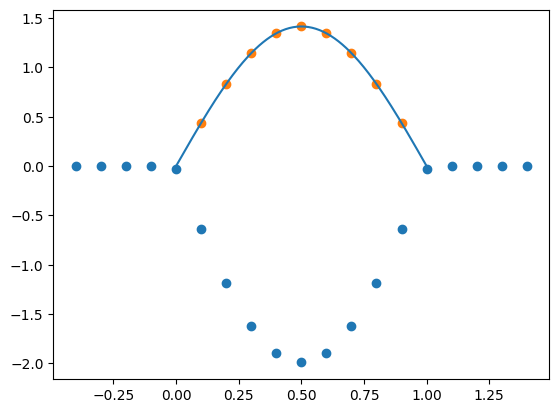

In [46]:
# Plot and compare the first eigenstate of T+V (blue dots), dirichlet(orange dots), and analytic(line)
xd = np.linspace(0, 1, 200)

plt.figure()

plt.plot(xd, np.sqrt(2) * np.sin(np.pi * xd))

psi_barrier = psi[:,0] / np.sqrt(L/(N-1))
plt.scatter(x[1:-1], psi_barrier)

psi_dirichlet = psi_dir[:,0] / np.sqrt(1/(11-1))
x_dir = np.linspace(0,1,11)[1:-1]
plt.scatter(x_dir, psi_dirichlet)

plt.show()

#psi qualitatively seems quite close to zero outside the box

In [47]:
# Check the probability for outside the box for different c
def prob_outside(psi, x):
    outside = (x <= 0) | (x >= 1)
    return np.sum(psi[outside]**2)

N = 21
L = 1.0
m = 1.0

c_values = [10, 50, 100, 300, 1000, 3000]

for c in c_values:
    T = kineticOP(N, m, 2*L)
    V, x = potentialOP(N, L, c)
    H = T + V[1:-1, 1:-1]

    E, psi = np.linalg.eigh(H)

    psi0 = psi[:,0]
    P_out = prob_outside(psi0, x[1:-1])

    print("c =", c, "E0 =", E[0], "P(outside) =", P_out)
#around c ≈ 1000, the ground-state energy differs from the analytic
#value by about the same amount as the Dirichlet case
#Therefore, c = 1000 is a reasonable value

c = 10 E0 = 2.6310695197433684 P(outside) = 0.08149370192543669
c = 50 E0 = 3.875156054697117 P(outside) = 0.012642910156632077
c = 100 E0 = 4.254005910816794 P(outside) = 0.004610731755914102
c = 300 E0 = 4.625985086256167 P(outside) = 0.0007659135979929622
c = 1000 E0 = 4.80423472186798 P(outside) = 8.520516746417117e-05
c = 3000 E0 = 4.863152821568941 P(outside) = 1.0193579241901964e-05


In [48]:
H_dir = kineticOP(11, m, L)
E_dir, psi_dir = np.linalg.eigh(H_dir)

print("n   finite barrier     Dirichlet")
for n in range(7):
    print(n+1, E[n], E_dir[n])

#For low-energy states: energies agree very well,
#wavefunctions are strongly suppressed outside the box

#For higher-energy states: leakage outside increases
#energy discrepancies grow

n   finite barrier     Dirichlet
1 4.863152821568941 4.894348370484679
2 18.985096598835618 19.09830056250524
3 41.00601240526204 41.221474770752664
4 68.7987628128921 69.09830056250523
5 99.6666259123067 99.99999999999993
6 130.59812192301118 130.90169943749467
7 158.55750130237024 158.77852522924735
